In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import torch
from covapt_mt.covapt import covariance_model
from covapt_mt.utils import load_config_file

In [19]:
config_dict = load_config_file("config/get_covariance.yaml")

k_data = np.load(config_dict["input_dir"] + config_dict["k_array_file"])
k_0 = k_data["k_0"]
print(config_dict["output_dir"] + config_dict["covariance_file"])
C_data = np.load(config_dict["output_dir"] + config_dict["covariance_file"])#+ config_dict["covariance_file"])
C_G, P_G = [], []
num_zbins = len(C_data.files)
num_tracers = config_dict["num_tracers"]
num_spectra = int(num_tracers*(num_tracers+1)/2)
num_kbins = len(k_0)

print(k_0, len(k_0))

for z in range(num_zbins):
    C_G.append(C_data["zbin_"+str(z)])
    P_G.append(np.linalg.inv(C_G[z]))

/home/joeadamo/Research/SPHEREx/covapt_mt/data/output_data/m2e/cov_m2e_with_quadropole.npz
[0.00651523 0.01797491 0.02943458 0.04089425 0.05235393 0.0638136
 0.07527327 0.08673295 0.09819262 0.10965229 0.12111197 0.13257164
 0.14403131 0.15549099 0.16695066 0.17841033 0.18987001 0.20132968
 0.21278935 0.22424903 0.2357087  0.24716837] 22


In [20]:
def CorMat(cov):
    rms = np.sqrt(np.diag(cov))
    cor = np.copy(cov)
    for i in range(cov.shape[0]):
        for j in range(cov.shape[0]):
            cor[i,j] = cov[i,j]/(rms[i]*rms[j])
    return cor

Covariance matrix is positive definite! :)
Correlation matrix is positive definite! :)
-24636716.27379736 505012459.74407005


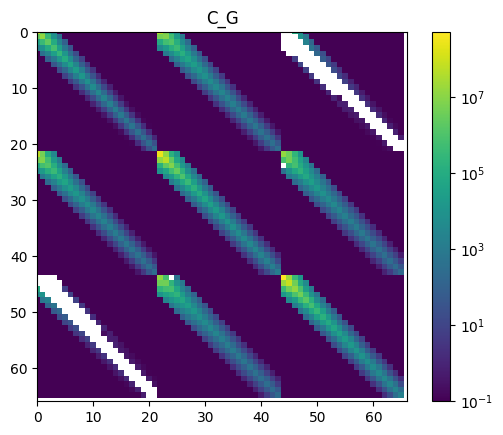

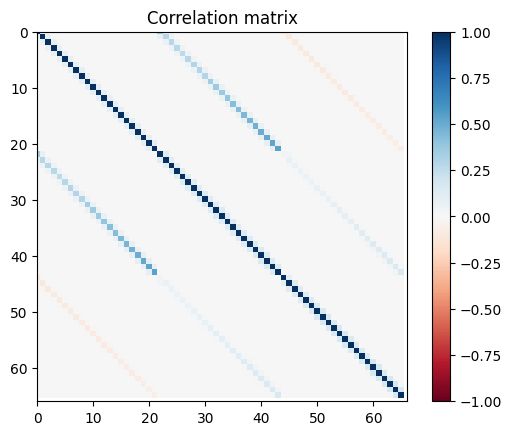

In [21]:
for z in range(num_zbins):

    # idx = np.where(C_G[z] < 1e10)
    # print(idx)
    # C_G[z][idx] = 0
    #C_G[z][(C_G[z] < 10)] = 0
    corr = CorMat(C_G[z])
    
    try:
        L = np.linalg.cholesky(C_G[z])
        print("Covariance matrix is positive definite! :)")
    except:
        print("ERROR! Covariance matrix is not positive definite!")

    try:
        L = np.linalg.cholesky(corr)
        print("Correlation matrix is positive definite! :)")
    except:
        print("ERROR! Correlation matrix is not positive definite!")
    
    print(np.amin(C_G[z]), np.amax(C_G[z]))
    plt.figure()
    plt.title("C_G")
    img = plt.imshow(C_G[z], cmap="viridis",  norm=colors.LogNorm(vmin=0.1, vmax=np.amax(C_G[z])))
    #img = plt.imshow(C_G[z], cmap="RdBu",  norm=colors.SymLogNorm(linthresh=1., vmin=np.amin(C_G[z]), vmax=np.amax(C_G[z])))
    for i in range(num_spectra):
        plt.axvline(i*num_kbins*2 - 1, c="black", alpha=0.2)
        plt.axhline(i*num_kbins*2 - 1, c="black", alpha=0.2)
    plt.xlim(0, num_spectra*3*num_kbins)
    plt.ylim(num_spectra*3*num_kbins, 0)
    plt.colorbar()
    
    plt.figure()
    plt.title("Correlation matrix")
    img = plt.imshow(corr, vmin=-1, vmax=1, cmap="RdBu")
    for i in range(num_spectra):
        plt.axvline(i*num_kbins*3 - 1, c="black", alpha=0.2)
        plt.axhline(i*num_kbins*3 - 1, c="black", alpha=0.2)
    plt.xlim(0, num_spectra*3*num_kbins)
    plt.ylim(num_spectra*3*num_kbins, 0)
    plt.colorbar()

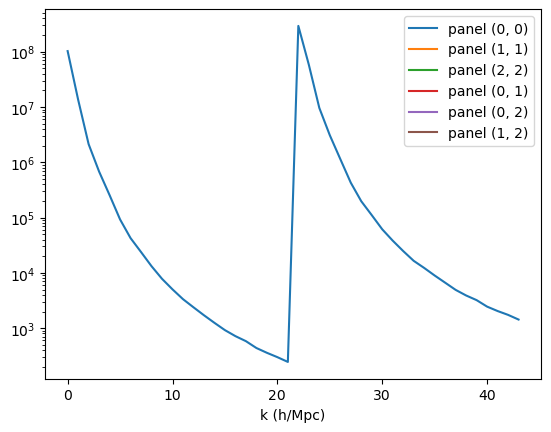

In [5]:
plt.plot(np.diag(C_G[0])[:2*num_kbins], label="panel (0, 0)")
plt.plot(np.diag(C_G[0])[2*num_kbins:4*num_kbins], label="panel (1, 1)")
plt.plot(np.diag(C_G[0])[4*num_kbins:6*num_kbins], label="panel (2, 2)")
plt.plot(np.diag(C_G[0][:2*num_kbins, 2*num_kbins:4*num_kbins]), label="panel (0, 1)")
plt.plot(np.diag(C_G[0][:2*num_kbins, 4*num_kbins:6*num_kbins]), label="panel (0, 2)")
plt.plot(np.diag(C_G[0][2*num_kbins:4*num_kbins, 4*num_kbins:6*num_kbins]), label="panel (1, 2)")
#plt.plot(np.diag(C_G[0])[num_kbins:], label="(2, 2) diagonal")
#plt.xscale("log")
plt.yscale("log")

plt.xlabel("k (h/Mpc)")
plt.legend()

there are 0 negative eigenvalues!
there are 0 eigenvalues equal to 0!


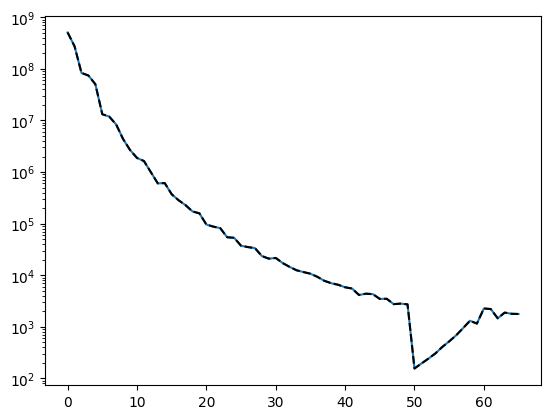

In [22]:
for z in range(num_zbins):
    eigvals_true, __ = np.linalg.eig(C_G[z])
    
    print("there are {:0.0f} negative eigenvalues!".format(len(eigvals_true[(eigvals_true < 0)])))
    print("there are {:0.0f} eigenvalues equal to 0!".format(len(eigvals_true[(eigvals_true == 0)])))
    plt.figure()
    plt.plot(eigvals_true)
    plt.plot(abs(eigvals_true), c="black", ls="--")
    plt.yscale("log")

hi
'Fixed' Covariance matrix is positive definite! :)
there are 0 negative eigenvalues!
'Fixed' Covariance matrix is positive definite! :)
there are 0 negative eigenvalues!


/tmp/ipykernel_58491/1784690340.py:29: RuntimeWarning: divide by zero encountered in divide
  plt.imshow(100*(C_fixed - C_G[z]) / C_G[z], cmap="RdBu")
/tmp/ipykernel_58491/1784690340.py:29: RuntimeWarning: invalid value encountered in divide
  plt.imshow(100*(C_fixed - C_G[z]) / C_G[z], cmap="RdBu")


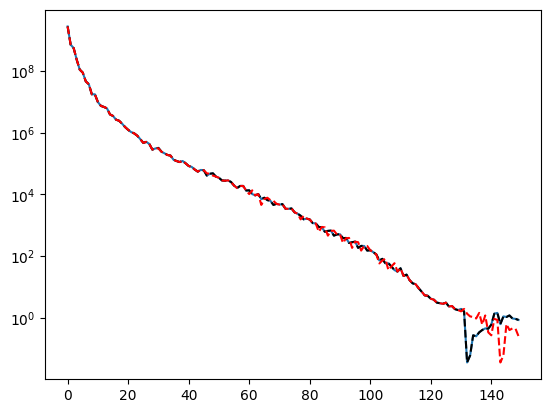

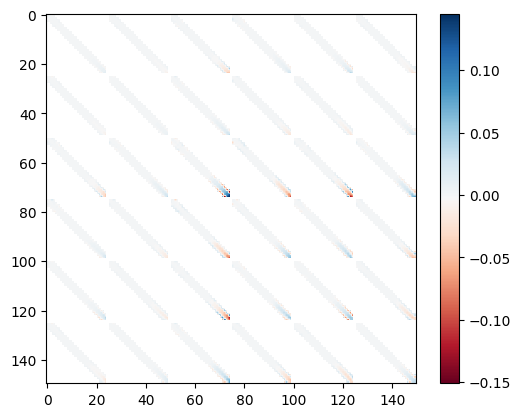

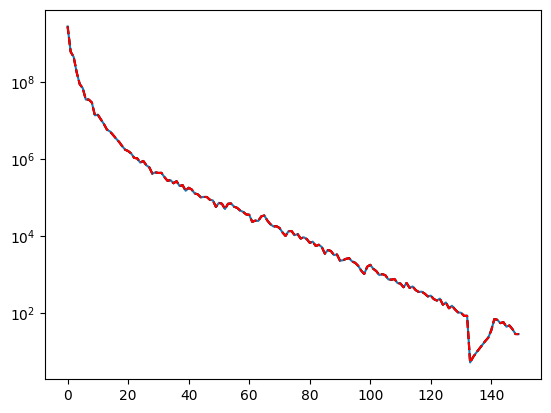

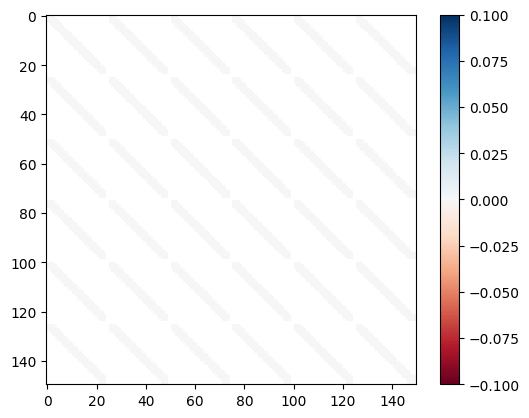

In [6]:
# TEMP FIX: manually set eigenvalues to positive
# DO THIS AT YOUR OWN PERIL!
C_G_fixed = []
for z in range(num_zbins):
    eigvals_true, Q = np.linalg.eig(C_G[z])
    if np.any(eigvals_true < 0):
        print("hi")
        C_fixed = Q @ (np.diag(abs(eigvals_true)) @ np.linalg.inv(Q))
    else:
        C_fixed = C_G[z]
        
    try:
        L = np.linalg.cholesky(C_fixed)
        L = np.linalg.cholesky(np.linalg.inv(C_fixed))
        print("'Fixed' Covariance matrix is positive definite! :)")
    except:
        print("ERROR! 'Fixed' Covariance matrix is not positive definite!")
    
    C_G_fixed.append(C_fixed)
    eigvals, Q = np.linalg.eig(C_fixed)
    print("there are {:0.0f} negative eigenvalues!".format(len(eigvals[(eigvals < 0)])))
    plt.figure()
    plt.plot(eigvals)
    plt.plot(abs(eigvals), c="black", ls="--")
    plt.plot(abs(eigvals_true), c="red", ls="--")
    plt.yscale("log")
    
    plt.figure()
    plt.imshow(100*(C_fixed - C_G[z]) / C_G[z], cmap="RdBu")
    plt.colorbar()
    # plt.plot(np.diag(C_G[0]), label="raw matrix")
    # plt.plot(np.diag(C_fixed), ls="--", label="fixed matrix")
    # plt.yscale("log")
    # plt.legend()

In [12]:
def check_leading_principle_minors(cov):
    """A leading principle minora is defined as the determinant of a submatrix with the last n rows / columns
    removed. For a positive-definite block matrix, all leading principle minors should be positive"""
    negative_minors = 0
    n = cov.shape[0]
    for k in range(1, cov.shape[0]):
        cov_sub = cov[:n-k, :n-k]
        det_sign, det = np.linalg.slogdet(cov_sub)
        if det_sign == -1:
            print("k = {:0.0f} has a negative principle minor!".format(k))
            negative_minors += 1
    if negative_minors == 0: print("All leading principle minors are positive")

In [13]:
# check if subsets of the covariance matrix are positive-definite
for z in range(num_zbins):

    check_leading_principle_minors(C_G[z])
    det_sign, det = np.linalg.slogdet(C_G[z])
    print("Log determinant = {:0.3e}".format(det * det_sign))
    
    for i in range(num_spectra):
        for j in range(num_spectra):
            C_sub = C_G[z][i*2*num_kbins: (i+1)*2*num_kbins,j*2*num_kbins: (j+1)*2*num_kbins]
            #check_leading_principle_minors(C_sub)
            det_sign, det = np.linalg.slogdet(C_sub)
            print("sub log determinant = {:0.3e}".format(det * det_sign))
            try:
                L = np.linalg.cholesky(C_sub)
                print("Partial covariance matrix ({:0.0f}, {:0.0f}) is positive-definite :)".format(i, j))
            except:
                print("Partial covariance matrix ({:0.0f}, {:0.0f}) is NOT positive-definite".format(i, j))
        #print(i*2*num_kbins, j*2*num_kbins)
        #C_sub = C_G[0][

# plt.imshow(CorMat(C_sub), cmap="RdBu", vmin=-1, vmax=1)
# plt.colorbar()

All leading principle minors are positive
Log determinant = 1.417e+03
sub log determinant = 1.417e+03
Partial covariance matrix (0, 0) is positive-definite :)


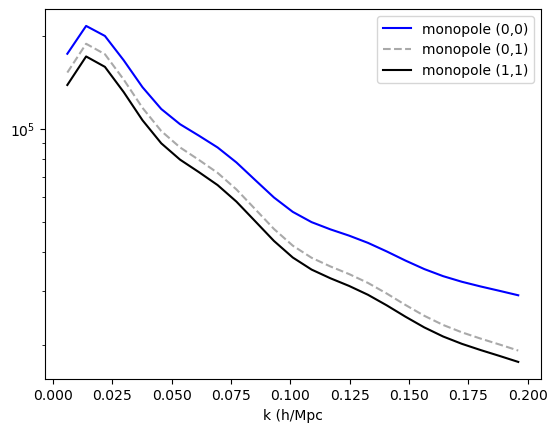

In [30]:
#pk = np.load("/home/joeadamo/Research/SPHEREx/spherex_emu/data/ps_fid.npy")
pk= np.load("/home/joeadamo/Research/SPHEREx/covapt_mt/data/input_data/ps_emu_test_2_tracers.npy")

# plt.plot(pk[0,0,0,:], label="idx 0")
# plt.plot(pk_2[0,0,0,:], ls="--", label="idx 0 2")
# plt.plot(pk[0,0,1,:], label="idx 1")
# plt.plot(pk_2[0,0,1,:], ls="--", label="idx 1 2")
# plt.legend()
# plt.yscale("log")

plt.figure()
plt.plot(k_0, pk[0,0,0,:], c="blue", label="monopole (0,0)")
#plt.plot(pk[0,3,0,:], c="red",label="monopole (1,1)")
#plt.plot(pk[0,5,0,:], c="green",label="monopole (2,2)")
#plt.axhline(1. / 0.00282, c="red", ls="--")
plt.plot(k_0, pk[0,1,0,:], c="darkgrey", ls="--", label="monopole (0,1)")
plt.plot(k_0, pk[0,2,0,:], c="black", label="monopole (1,1)")
#plt.plot(pk[0,4,0,:], c="grey", ls="--", label="monopole (1,2)")
plt.legend()
plt.xlabel("k (h/Mpc")
plt.yscale("log")

In [26]:
# Save the k array
#k = np.array([0.00694, 0.01482, 0.0227, 0.03058, 0.03846, 0.04634, 0.05422, 0.0621, 0.06998,
#              0.07786, 0.08574, 0.09362, 0.1015,  0.10938, 0.11726, 0.12514, 0.13302, 0.1409,
#              0.14878, 0.15666, 0.16454, 0.17242, 0.1803,  0.18818, 0.19606])
k = np.linspace(0.002, 0.2, 26)
k_centers = (k[:-1] + k[1:]) / 2
print(k_centers, len(k_centers))
np.savez("data/input_data/k_emu_test.npz", k_0=k_centers)

[0.00596 0.01388 0.0218  0.02972 0.03764 0.04556 0.05348 0.0614  0.06932
 0.07724 0.08516 0.09308 0.101   0.10892 0.11684 0.12476 0.13268 0.1406
 0.14852 0.15644 0.16436 0.17228 0.1802  0.18812 0.19604] 25


In [23]:
def flip_axes(cov, nps, nk, nl):
    """flip nk and nl dimensions"""
    new_cov = []
    for z in range(len(cov)):
        new_cov.append(np.zeros_like(cov[z]))
        print(new_cov[z].shape)
        tmp_cov = cov[z].reshape(nps, nl, nk, nps, nl, nk)
        tmp_cov = tmp_cov.transpose(0, 2, 1, 3, 5, 4)
        new_cov[z] = tmp_cov.reshape(nps*nk*nl, nps*nk*nl)
        print(tmp_cov.shape)
        
        # for ips in range(nps):
        #     for ik in range(nk):
        #         for il in range(nl):
        #             for jps in range(nps):
        #                 for jk in range(nk):
        #                     for jl in range(nl):
        #                         I = il + ik*nl + ips*nk*nl
        #                         J = jl + jk*nl + jps*nk*nl
        #                         new_cov[z][I,J] = cov[z][J,I]
    return new_cov

In [25]:
cov_reshape = flip_axes(C_G, num_spectra, num_kbins, 3)
np.savez(config_dict["output_dir"]+"cov_reshape.npz", cov_bin0=cov_reshape[0])
np.save(config_dict["output_dir"]+"invcov_with_quadropole.npy", np.linalg.inv(cov_reshape[0]))

(66, 66)
(1, 22, 3, 1, 22, 3)


(66, 66)
(1, 22, 3, 1, 22, 3)
[]


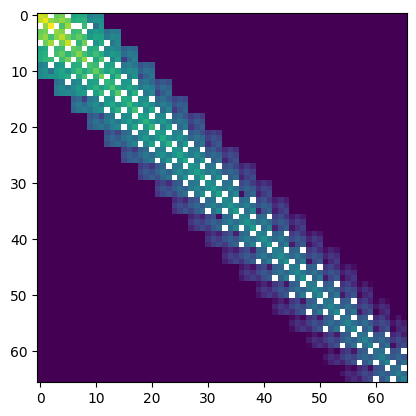

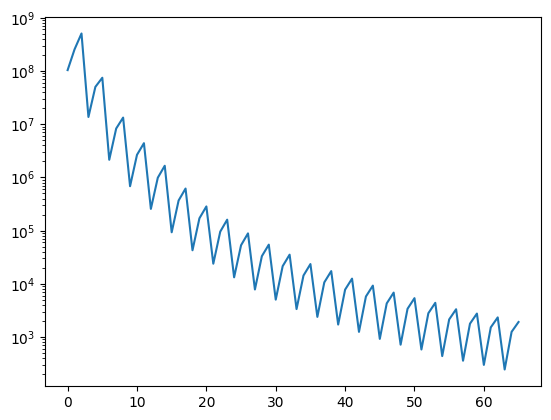

In [27]:
new_cov = flip_axes(C_G, num_spectra, num_kbins, 3)
eig, q = np.linalg.eigh(np.linalg.inv(new_cov[0]))
print(eig[(eig < 0)])

img = plt.imshow(new_cov[z], cmap="viridis",  norm=colors.LogNorm(vmin=0.1, vmax=np.amax(C_G[z])))

plt.figure()
plt.plot(np.diag(new_cov[z]))
plt.yscale("log")

In [52]:
# save inverse matrices as a dictionary of pytorch tensors
# NOTE: You should do this calculation in double percision to increase numerical stability
P = {}
P = torch.zeros((num_zbins, new_cov[0].shape[0], new_cov[0].shape[1]), dtype=torch.float64)
for z in range(num_zbins):
    bin_str = "zbin_"+str(z)
    print(bin_str)
    L = np.linalg.cholesky(new_cov[z])
    P[z] = torch.from_numpy(np.linalg.inv(new_cov[z]))

    eig, q = torch.linalg.eigh(P[z])
    print((eig[(eig < 0)]))
    assert torch.all(eig > 0)
    
print(config_dict["output_dir"])
print(P.shape, P.dtype)
torch.save(P, config_dict["output_dir"]+"invcov.dat")

zbin_0
tensor([], dtype=torch.float64)
zbin_1
tensor([], dtype=torch.float64)
/home/joeadamo/Research/SPHEREx/covapt_mt/data/output_data/
torch.Size([2, 150, 150]) torch.float64


Text(0, 0.5, 'diagonal covariance')

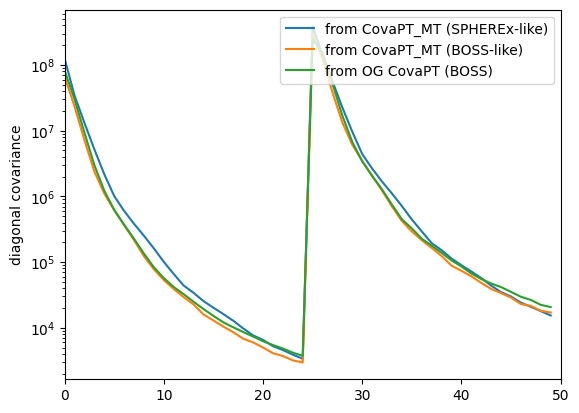

In [18]:
#old_cov_file = "/home/joeadamo/Research/Data/SPHEREx-Data/invcov.npy"
#old_cov = np.load(old_cov_file)
covnet_cov_file = np.load("/home/joeadamo/Research/Data/CovNet-Data/Cov_Fid.npz")
covnet_cov = covnet_cov_file["C_G"]

boss_cov_file = np.load("/home/joeadamo/Research/SPHEREx/covapt_mt/data/output_data/cov_boss.npz")
boss_cov = boss_cov_file["zbin_0"]
#plt.imshow(CorMat(old_cov[0]), cmap="RdBu", vmin=-1, vmax=1)

plt.figure()
#plt.plot(np.diag(np.linalg.inv(old_cov[0])), label="from Cosmo_Inference")
plt.plot(np.diag(C_G[0]), label="from CovaPT_MT (SPHEREx-like)")
plt.plot(np.diag(boss_cov), label="from CovaPT_MT (BOSS-like)")
plt.plot(np.diag(covnet_cov), label="from OG CovaPT (BOSS)")
plt.yscale("log")
plt.legend()
plt.xlim(0, 50)
plt.ylabel("diagonal covariance")

# plt.figure()
# plt.plot(np.diag(boss_cov) / np.diag(covnet_cov))
# plt.yscale("log")

(1, 1, 2, 25)


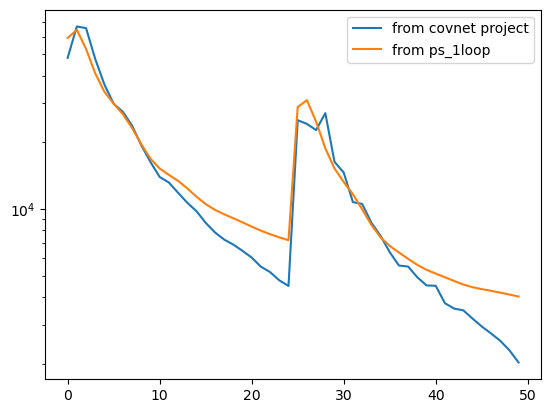

In [82]:
ps_covnet = np.load("/home/joeadamo/Research/Data/CovNet-Data/pk_ngc_z3_noisy.npz")
ps_covnet = ps_covnet["pk_noisy"][0]
ps_boss = np.load("/home/joeadamo/Research/SPHEREx/covapt_mt/data/input_data/ps_boss.npy")
print(ps_boss.shape)

plt.plot(ps_covnet, label="from covnet project")
plt.plot(ps_boss.flatten(), label="from ps_1loop")
plt.legend()
plt.yscale("log")

(25, 7, 15, 6) (25, 7, 15, 6)


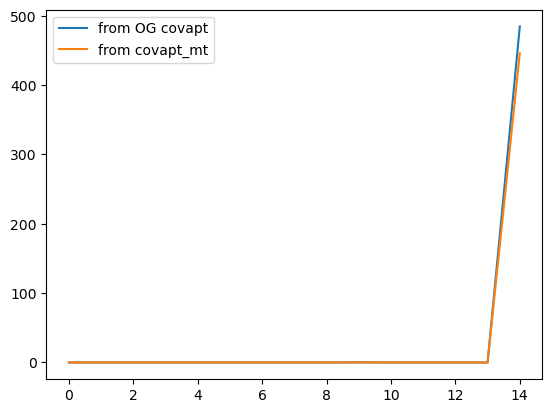

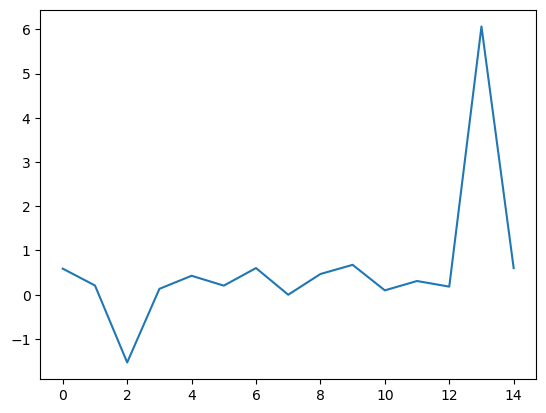

In [95]:
old_window = "/home/joeadamo/Documents/Research/CovaPT/Data/Wij_k25_HighZ_NGC.npy"
new_window = "/home/joeadamo/Research/SPHEREx/covapt_mt/data/output_data/Wij_boss_0.npy"

Wij_covnet = np.load(old_window)
Wij_new = np.load(new_window)

print(Wij_covnet.shape, Wij_new.shape)

plt.plot(Wij_covnet[10, 4, :, 0], label="from OG covapt")
plt.plot(Wij_new[10, 4, :, 0], label="from covapt_mt")
plt.legend()

plt.figure()
plt.plot(Wij_new[10, 5, :, 0] / Wij_covnet[10, 5, :, 0])